# 第2回課題

## 課題1

まず、長さnで全ての要素がFalseの配列aを用意し、iが7の倍数か、各桁の和が7の倍数の時にa[i]にTrueを代入した。a[0]はFalseなのでfor文はi = 1から始めた。各桁の和を求めるのには前にやったdigit_sum(n)を用いた。

In [8]:
import math
def digit_sum(n):
    sum = 0
    while n > 0:
        d = n % 10
        sum += d
        n //= 10
    return sum

def lucky_array(n):
    a = [False for i in range(n)]
    for i in range(1,n):
        if (i % 7 == 0) or (digit_sum(i) % 7 == 0):
            a[i] = True
    return a

## 課題2
全ての要素がTrueで長さnの配列aを用意し、a[0]、a[1] = Falseとした。そして「a[i]がTrueの場合，iを残し，iより大きくn未満のiの倍数を全てFalseとする」という手順を i=2 から，i=math.floor(math.sqrt(n)) まで繰り返した。jの範囲指定は、while文を用いた、条件判定はi * j <= nとした。そして、空の配列bを用意し、a[i]がTrueの時にbにiを追加していくと、n未満の素数が得られる。

In [38]:
import math
def prime_array(n):
    a = [True for i in range(n)]
    a[0] = a[1] = False
    for i in range(2,math.floor(math.sqrt(n))):
        if a[i] == True:
            j =2
            while j * i <= n:
                a[i * j] = False
                j+=1
    b = []
    for i in range(n):
        if a[i]:
            b.append(i)
    return b


[2, 3, 5, 7, 11, 13, 17, 19, 23]


## 課題3
まず、配列の指定した行の和、列の和を求める関数rsum(a, r), vsum(a, c)を定義した。そしてrsum(a,r)を用いて配列aの横方向にその和の要素を追加する。また、vsum(a,r)を用いてaの縦方向の和を要素にもつ配列bを用意する。最後にaとbを縦に結合す流のは,a.append(b)でできる。

In [10]:
def rsum(a, r):
    sum = 0
    for i in range(len(a[r])):
        sum += a[r][i]
    return sum

def vsum(a, c):
    sum = 0
    for i in range(len(a)):
        sum += a[i][c]
    return sum

def extend_sum(a):
    for i in range(len(a)):
        a[i].append(rsum(a, i))
    b = []
    for i in range(len(a[0])):
        b.append(vsum(a, i))
    a.append(b)
    return a

## 課題4
テキストの誘導に従って関数を定義していき、next_field(a)を定義した。生死の判断をする際には、まず与えた配列aのneighbor_countを配列bに格納してから、next_cell_living(a[i][j], b[i][j])で生死を判定した。配列の幅と高さを逆に定義するミスが多く、list index out of rangeのエラーをなんども吐かれて苦労した。

In [4]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def plot(array2d):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    im = ax.imshow(array2d, interpolation="nearest", cmap="Greys") 
    fig.show() # fig.savefig("plot.pdf")a =plot(a)
    
def show_animation(initial_field,step): 
    a = []
    fig = plt.figure()
    field = initial_field
    for i in range(step): 
        a.append([plt.imshow(field)]) 
        field = next_field(field)
    anim = animation.ArtistAnimation(fig, a, interval=500) 
    plt.show()
    return anim


def make_field(height,width,living):
    a = [[False for i in range(width)] for j in range(height)]
    for i in range(len(living)):
        a[living[i][0]][living[i][1]] = True
    return a

def inside(field, r, c):
    if (0 <= r <= len(field) -1) and (0 <= c <= len(field[0])-1):
        return True
    else:
        return False

def is_living_cell(field, r, c):
    if inside(field, r, c) and field[r][c]:
        return 1
    else:
        return 0
    
def count(field, r, c):
    sum = 0
    for i in [-1,0,1]:
        for j in [-1,0,1]:
            if (i != 0 or j != 0):
                if inside(field, r + i, c + j):
                    sum += is_living_cell(field, r + i, c + j)
    return sum

def next_cell_living(living, neighbor_count):
    if living:
        if 2 <= neighbor_count <= 3:
            return True
        else:
            return False
    else:
        if neighbor_count == 3:
            return True
        else:
            return False

def next_field(a):
    b = [[count(a, i, j)for j in range(len(a[0]))] for i in range(len(a))]
    for i in range(len(a)):
        for j in range(len(a[i])):
            a[i][j] = next_cell_living(a[i][j], b[i][j])
    return a

## 課題5
動画より、glider の周期は4, 移動幅は縦、横共に1だった。lightweight_spaceshipの周期は4 移動幅は横に2だった。
テスト結果は初期状態と１周期後の状態を比較している。

<IPython.core.display.Javascript object>


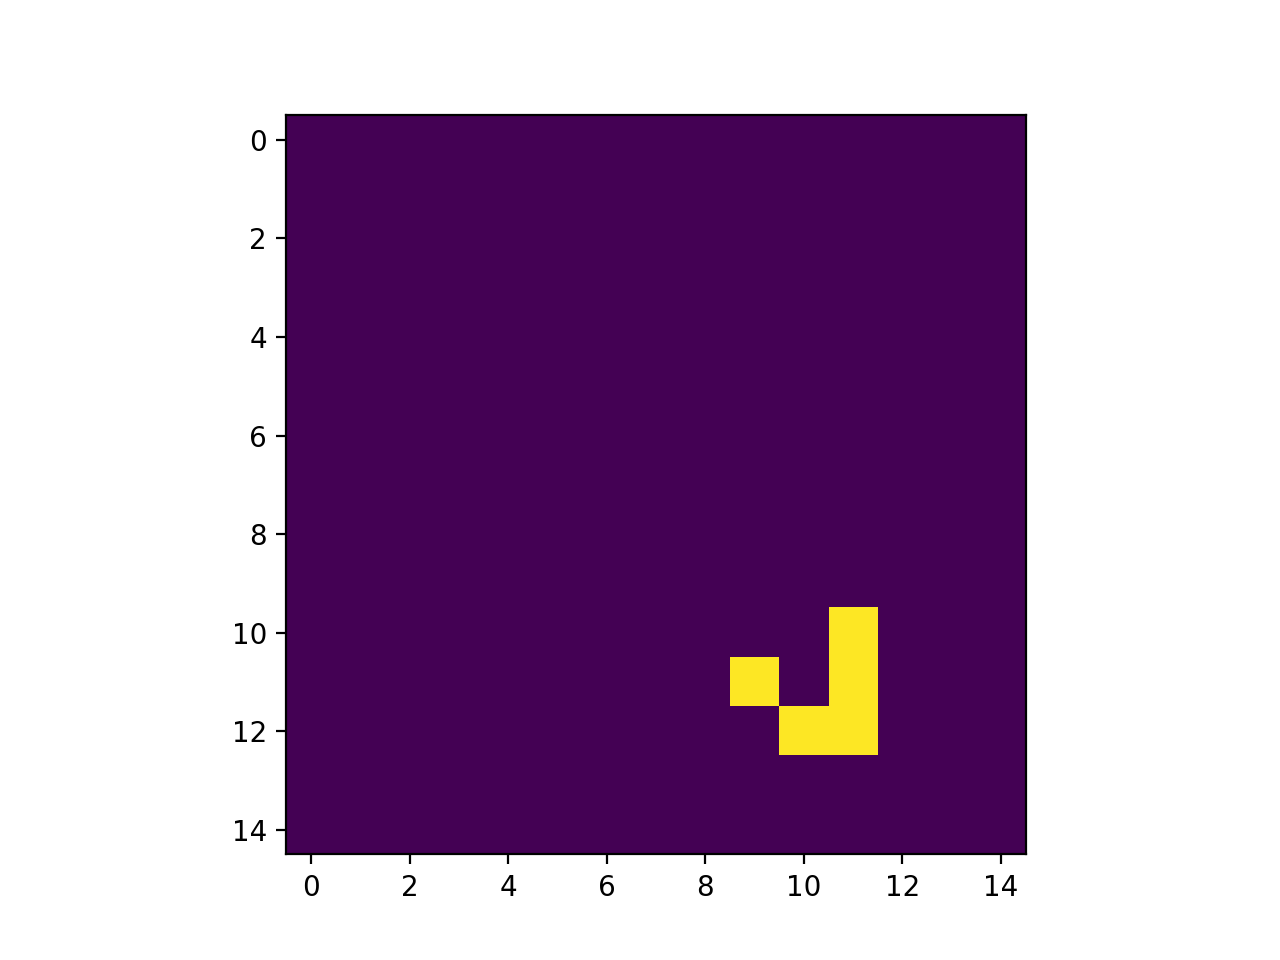

<IPython.core.display.Javascript object>


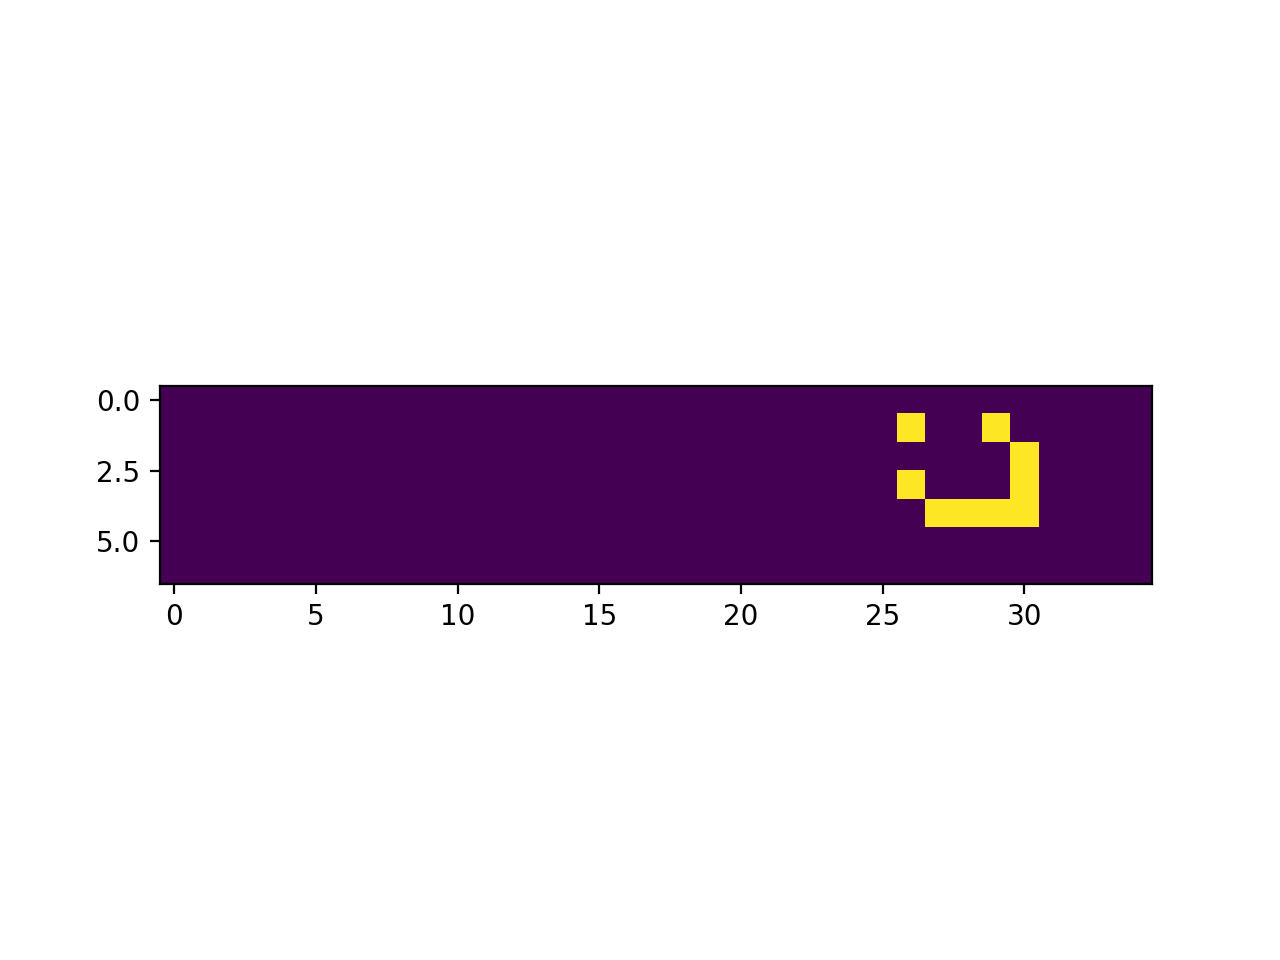

In [5]:
glider = [[0,1],[1,2],[2,0],[2,1],[2,2]]
lightweight_spaceship = [[1,3],[1,4],[2,2],[2,3],[2,4],[2,5],[3,2],[3,3],[3,5],[3,6],[4,4],[4,5]]

anim1 = show_animation(make_field(15,15,glider),50)
anim2 = show_animation(make_field(7,35, lightweight_spaceship),50)

anim1.save("filename1.mp4")
anim2.save("filename2.mp4")

##課題6
clockは周期2で振動を繰り返す。beehiveは固定型なので、同じ形を保ち続ける。
trafic_lightもclockと同じく周期２で振動している。
テストは初期状態と4単位時間後の比較を行った。
どれも初期状態と一致しているはずである。

<IPython.core.display.Javascript object>


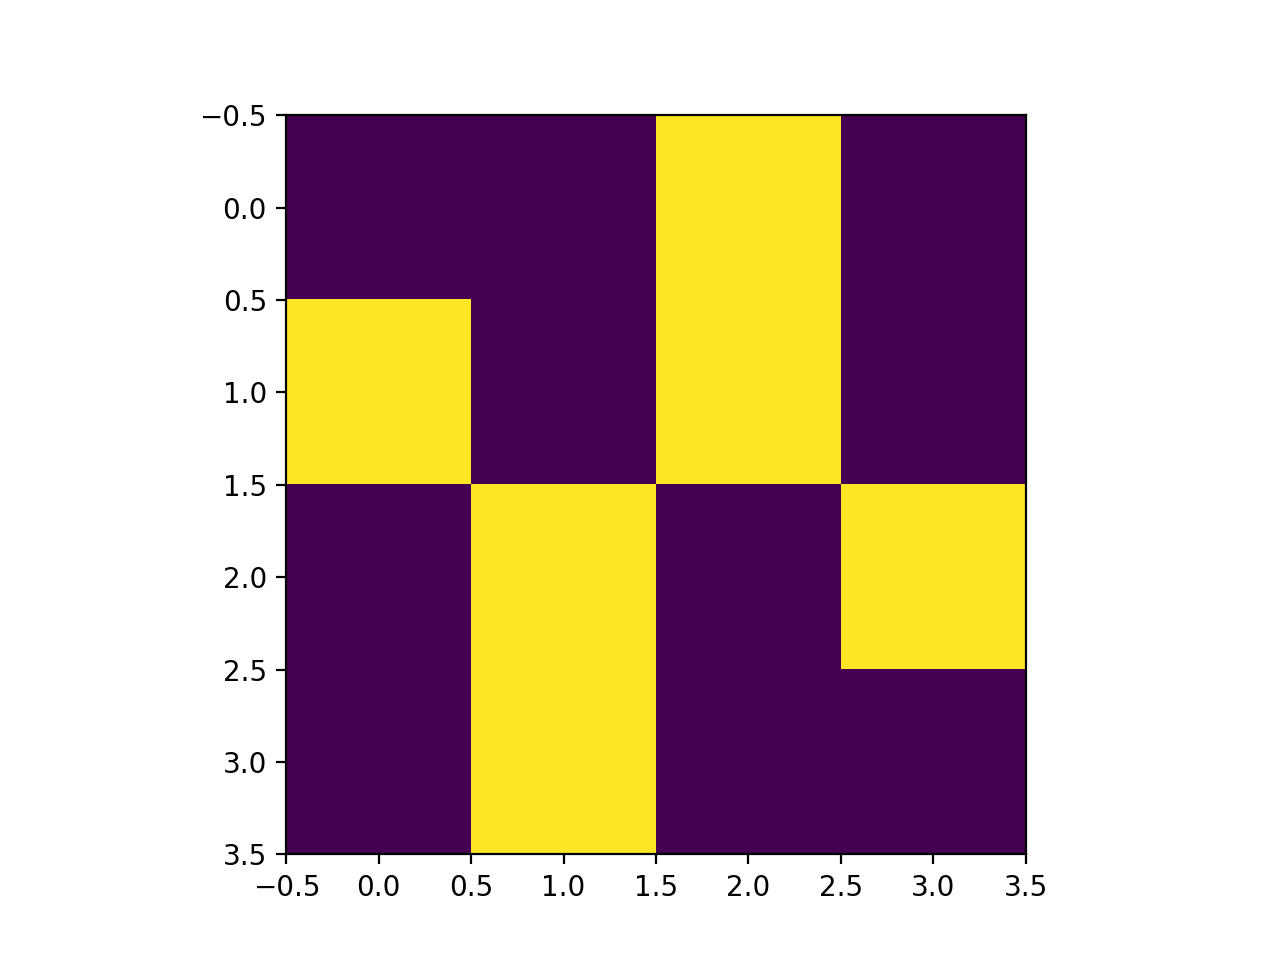

<IPython.core.display.Javascript object>


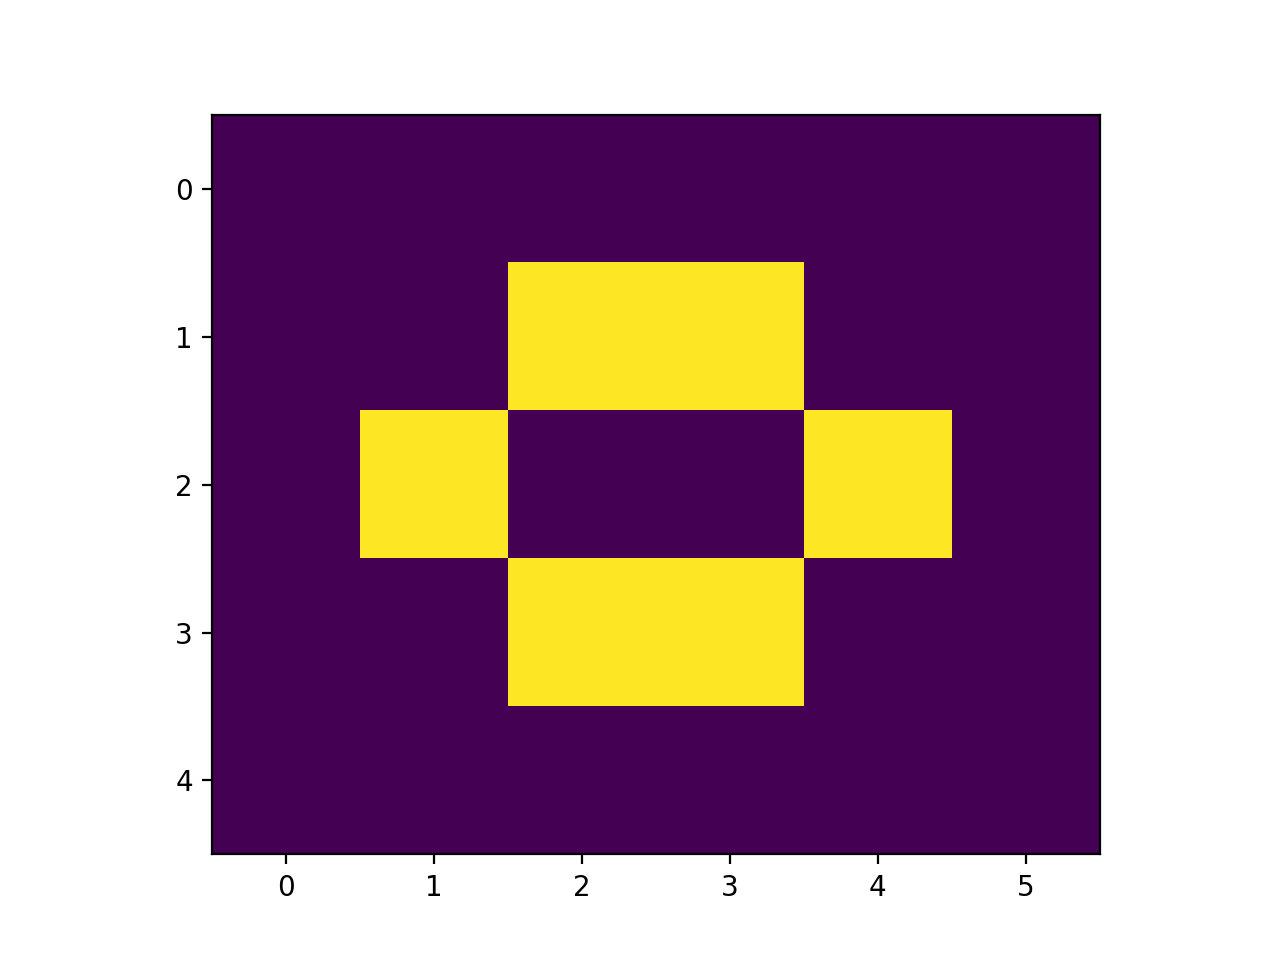

<IPython.core.display.Javascript object>


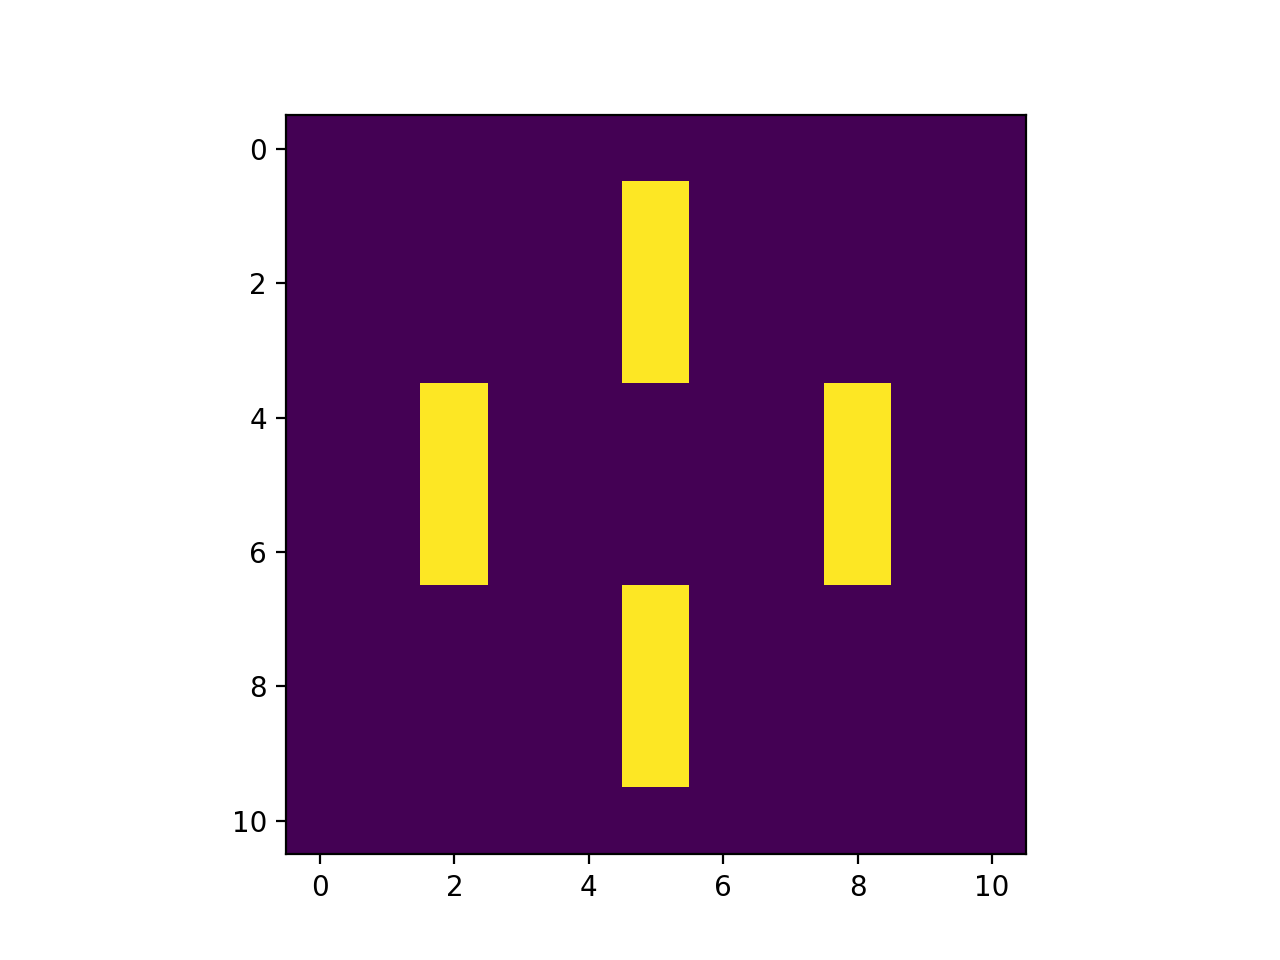

In [6]:
clock = [[0,1],[1,2],[1,3],[2,0],[2,1],[3,2]]
beehive = [[1,2],[1,3],[2,1],[2,4],[3,2],[3,3]]
trafic_light = [[2,4],[2,5],[2,6],[5,1],[5,2],[5,3],[5,7],[5,8],[5,9],[8,4],[8,5],[8,6]]

anim3 = show_animation(make_field(4,4, clock),50)
anim4 = show_animation(make_field(5,6, beehive),50)
anim5 = show_animation(make_field(11,11, trafic_light),50)

anim3.save("filename3.mp4")
anim4.save("filename4.mp4")
anim5.save("filename5.mp4")

## テストコード

In [39]:
import unittest

class TestKadai(unittest.TestCase):
    
    def test_kadai1(self):
        lucky_numbers = [False for _ in range(30)]
        lucky_numbers[7] = True
        lucky_numbers[14] = True
        lucky_numbers[21] = True
        lucky_numbers[28] = True
        lucky_numbers[16] = True
        lucky_numbers[25] = True
        self.assertEqual(lucky_numbers, lucky_array(30))
        
    def test_kadai2(self):
        self.assertEqual([2, 3, 5, 7, 11, 13, 17, 19, 23], prime_array(25))
    
    def test_kadai3(self):
        a = [[1,2,3],[10,20,30]]
        self.assertEqual([[1, 2, 3, 6], [10, 20, 30, 60], [11, 22, 33, 66]], extend_sum(a))
    
    def test_kadai4(self):
        self.assertEqual([[False, False, False], [False, False, False]], make_field(2,3,[]))
    
    def test_kadai5(self):
        a = make_field(5, 5, [[0,1], [1,2], [2,0], [2,1], [2,2]])
        b = make_field(5, 5, [[1,0], [1,2], [2,1], [2,2] ,[3,1]])
        self.assertEqual(b, next_field(a))
    
    def test_kadai6(self):
        glider = [[0,1],[1,2],[2,0],[2,1],[2,2]]
        glider4 = [[1,2],[2,3],[3,1],[3,2],[3,3]]
        a = make_field(15,15,glider)
        b = make_field(15,15,glider4)
        for i in range(4):
            a = next_field(a)
        self.assertEqual(a, b)
    
    def test_kadai7(self):
        lightweight_spaceship = [[1,3],[1,4],[2,2],[2,3],[2,4],[2,5],[3,2],[3,3],[3,5],[3,6],[4,4],[4,5]]
        lightweight_spaceship4 = [[1,5],[1,6],[2,4],[2,5],[2,6],[2,7],[3,4],[3,5],[3,7],[3,8],[4,6],[4,7]]
        a = make_field(7,35, lightweight_spaceship)
        b = make_field(7,35, lightweight_spaceship4)
        for i in range(4):
            a = next_field(a)
        self.assertEqual(a, b)
        
    def test_kadai8(self):
        clock = [[0,1],[1,2],[1,3],[2,0],[2,1],[3,2]]
        a = b = make_field(4,4, clock)
        for i in range(4):
            a = next_field(a)
        self.assertEqual(a, b)

    def test_kadai9(self):
        beehive = [[1,2],[1,3],[2,1],[2,4],[3,2],[3,3]]
        a = b = make_field(5,6, beehive)
        for i in range(4):
            a = next_field(a)
        self.assertEqual(a, b)
    
    def test_kadai10(self):
        trafic_light = [[2,4],[2,5],[2,6],[5,1],[5,2],[5,3],[5,7],[5,8],[5,9],[8,4],[8,5],[8,6]]
        a = b = make_field(11,11, trafic_light)
        for i in range(4):
            a = next_field(a)
        self.assertEqual(a, b)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..........
----------------------------------------------------------------------
Ran 10 tests in 0.054s

OK
